# Cómo leer archivos de MotionDAQ en Python


**Pablo Cobelli** - Departamento de Física, FCEN-UBA, Argentina.  
Laboratorios Básicos de Enseñanza - _Última actualización: Abril de 2022._  

**Este apunte tiene licencia [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/). **

----

## Código de la función

In [13]:
def leermd(filename):
    result = []
    from pandas import read_csv
    import numpy as np
    # Leer el archivo, separado por tabulaciones, salteando 3 lineas de header
    #     y empleando la coma como separador decimal
    df = read_csv(filename, sep='\t', skiprows=3, decimal=',')
    # Convertir el dataframe de pandas a un array de numpy
    nparray = df.values
    # Remover los posibles nans del archivo
    nparray = nparray[~np.isnan(nparray).any(axis=1)]
    # Asignar las columnas a variables de salida
    for cols in range(nparray.shape[1]):
        out = nparray[:,cols]
        result.append(out)
        
    return result

Esta función cumple con:
    
* Remover toda fila en la que haya un "NaN", lo que ocurre frecuentemente con los últimos elementos del archivo MotionDAQ
* Devolver tantas variables de salida como columnas tenga el archivo original
* Devolver variables que son ndarrays de numpy
* Compensar el hecho de que el archivo de MotionDAQ usa la coma "," como separador decimal
* Saltearse las líneas iniciales que corresponden al header del archivo MotionDAQ

## Modo de uso

La funcion de lectura se invoca de la siguiente forma:

In [14]:
ts, ph = leermd('motiondaqdata.txt')

Confirmamos que la funcion devuelve arrays de numpy (ndarrays) tipo `float64`:

In [15]:
type(ts), ts.dtype, type(ph), ph.dtype

(numpy.ndarray, dtype('float64'), numpy.ndarray, dtype('float64'))

Los contenidos comienzan y terminan segun lo esperado:

In [16]:
ts, ph

(array([0.000000e+00, 3.663000e-03, 7.326000e-03, ..., 9.989011e+00,
        9.992674e+00, 9.996337e+00]),
 array([0.3370326, 0.3445682, 0.3445682, ..., 0.3345208, 0.3345208,
        0.3370326]))

## Visualizando los datos

Finalmente es posible visualizar los datos cargados, en la siguiente forma:

In [17]:
# numpy, matplotlib inline & png retina
import matplotlib.pyplot as plt

Text(0, 0.5, 'Señal Photogate [u.a.]')

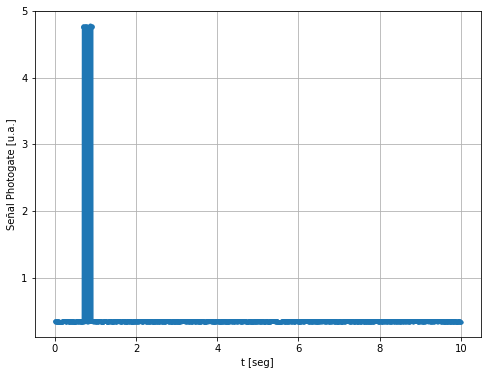

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ts,ph,'.-')
plt.grid('on')
plt.xlabel('t [seg]')
plt.ylabel('Señal Photogate [u.a.]')

In [19]:
import numpy as np

In [20]:
np.diff(ph)

array([0.0075356, 0.       , 0.       , ..., 0.       , 0.       ,
       0.0025118])

In [21]:
ph2 = ph[150:300]
len(ph2)

150

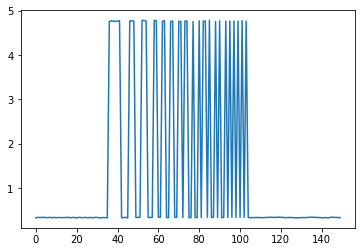

In [22]:
plt.plot(ph2)

20


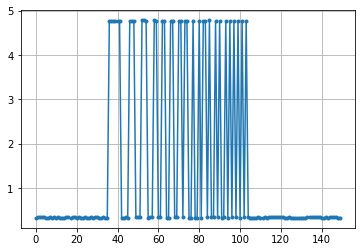

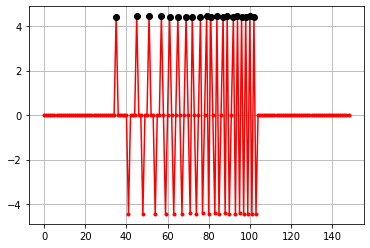

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

ts, ph = leermd("motiondaqdata.txt")

# la captura es mucho mas larga que la parte interesante de la 
# senal, vamos a cortar la parte que nos interesa

ph2 = ph[150:300]

plt.close('all')

plt.figure()
plt.plot(ph2,'.-')
plt.grid()

plt.figure()
plt.plot(np.diff(ph2),'r.-')
plt.grid()

dph2 = np.diff(ph2)


print(len(dph2[dph2>2]))

idx = np.where(dph2>3)[0]

plt.plot(idx,dph2[idx],'ko')
